# PDF Malware  Detection

#### import libraries that will be used for this project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
#sci-kit learn library
from sklearn.metrics import roc_curve, roc_auc_score # metrics for evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier



In [3]:
df = pd.read_csv('PDFMalware2022updated4_19.csv')  #here we'll read the data from the local directory 

In [4]:
df.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8,180,1,11,0,0,0,0,No,...,0,1,0,0,0,0,0,0,0,1
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15,224,0,20,7,0,0,0,No,...,0,0,1,0,0,0,8,1,0,1
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4,468,2,13,16,0,0,0,Yes,...,0,1,0,0,0,0,0,0,0,1
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17,250,1,15,0,0,0,0,No,...,0,1,1,0,0,0,0,0,0,1
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7,252,3,16,45,0,0,0,Yes,...,0,1,0,0,0,0,0,0,0,1


In [5]:
df.columns # possibly features in the dataset 

Index(['Fine name', 'pdfsize', 'metadata size', 'pages', 'xref Length',
       'title characters', 'isEncrypted', 'embedded files', 'images', 'text',
       'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer',
       'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA',
       'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch',
       'EmbeddedFile', 'XFA', 'Colors', 'Class'],
      dtype='object')

In [6]:
print(df[['Class', 'Fine name']]) #looking at the classes and fine names in the dataset 

      Class                                          Fine name
0         1  aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...
1         1  fe767fb2584a10c010626263ea950643ac25f6ca24628f...
2         1  544c5223ee301affad514b6fa585b3191625aba0a7222b...
3         1  669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...
4         1  e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...
...     ...                                                ...
9992      1  908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...
9993      1  72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...
9994      1  dad02289bc442e235961f4cf87cbde364a2250bdc57632...
9995      1  b219390e223ea263476d65277d00804cfd0a93023e1903...
9996      1  b76c4910d7c637f32ebf175247d489a311c2a584a1ac6d...

[9997 rows x 2 columns]


In [7]:
x_traindata = df[['pdfsize','metadata size', 'pages','xref Length','obj','endobj','stream','endstream','xref',
         'trailer', 'startxref','pageno','JS','Javascript','OpenAction','Acroform' ]]
y_traindata = df[['Class']]
#assignining x_trainingdata to the columns and rows that contain the data we will be using for training
#assigning the class column (which contains the labels) to the y_trainingdata to later be split for 
#training, testing, and validation

#### this block of code separates the data into training and testing if we wanted to maintain the order of the values but will be unused here 

x_train = x_traindata.iloc[:6000] #splitting the training data into training 
y_train = y_traindata.iloc[:6000] #here we get the first 6000 values for training
x_test = x_traindata.iloc[-2000:] #and here we get the last 2000 values and store it in testing 
y_test = y_traindata.iloc[-2000:]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_traindata, y_traindata, test_size=0.2)
#here we used sci-kit learning train/test/split function to split the dataset into training 
#and testing data with a test size of 20%

In [9]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2)
#here we use the same function again to split the training data into training and validation data
#Validation data is used to assess the model's performance on data that it has not seen during training. 
#This helps to detect overfitting and fine-tune the model's parameters to improve its 
#generalization performance

In [10]:
x_train #viewing the x_train datadframe 

,pdfsize,metadata size,pages,xref Length,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,JS,Javascript,OpenAction,Acroform
1210,23,277,1,30,14,14,2,2,1,1,1,1,2,3,1,1
3940,8,180,1,10,0,1,1,0,1,1,1,0,1,0,0,0
4562,453,275,1,45,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6836,79,262,1,21,13,13,4,4,1,1,1,2,0,0,0,0
5211,12,180,1,9,11,11,2,2,2,2,1,1,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,14,224,0,20,4,4,1,1,0,1,0,1,1,1,1,0
1275,2,180,1,9,15,15,2,2,1,1,1,1,1,2,0,1
9345,165,297,2,168,120,120,78,78,2,2,2,3,0,0,0,0
4196,46,180,3,15,15,15,2,2,1,1,1,1,1,1,1,0


In [11]:
x_train.shape #x_train has 6397 rows or samples and 16 columns or features

(6397, 16)

In [12]:
y_train.shape #y_train is 6397 rows and 1 column which will have the class column used for classifying

(6397, 1)

In [13]:
x_val #what the validation looks like 

,pdfsize,metadata size,pages,xref Length,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,JS,Javascript,OpenAction,Acroform
447,8,288,3,17,10,10,3,3,1,1,1,1,1,1,1,0
3640,-1,-1,-1,-1,7,7,1,1,0,1,0,0,0,0,0,1
9445,15,301,4,29,34,34,9,9,2,2,2,7,0,0,0,0
5597,53,307,4,53,52,52,17,17,2,2,2,4,0,0,0,0
9371,135,277,24,1748,387,387,23,23,1,1,1,15,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,46,180,1,11,9,9,3,3,1,1,1,1,1,1,1,0
1791,15,257,1,16,9,9,3,3,1,1,1,1,1,1,1,0
2315,4,250,1,15,9,9,2,2,0,1,0,1,2,3,0,0
1773,14,180,1,10,9,9,2,2,0,1,0,1,2,3,0,0


In [14]:
y_val #we can see that the indexes match the ones in the x_val so we can be sure they match 

,Class
447,1
3640,1
9445,0
5597,0
9371,0
...,...
2654,1
1791,1
2315,1
1773,1


## Convolutional Neural Network 

In [15]:
inputs = keras.Input(shape=(5997, 16)) #using a functional API 
x = layers.Conv1D(filters=16, kernel_size=2, activation="relu")(inputs)
x=layers.MaxPooling1D(pool_size=1)(x)
x = layers.Conv1D(filters=16, kernel_size=2,activation="relu")(x)
x = layers.MaxPooling1D(pool_size=1)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
x

<KerasTensor: shape=(None, 95920) dtype=float32 (created by layer 'dropout')>

In [17]:
x_train.shape

(6397, 16)

In [18]:
y_train.shape

(6397, 1)

In [19]:
inputs

<KerasTensor: shape=(None, 5997, 16) dtype=float32 (created by layer 'input_1')>

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5997, 16)]        0         
                                                                 
 conv1d (Conv1D)             (None, 5996, 16)          528       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5996, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5995, 16)          528       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5995, 16)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 95920)             0     

In [21]:
# model.compile(loss="binary_crossentropy",
#               optimizer="rmsprop",
#               metrics=["accuracy"])

In [1]:
#history = model.fit(x_train,y_train,epochs=50,validation_data=(x_val, y_val))

In [2]:
# epochs = range(1, len(history.history["loss"]) + 1)
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]
# plt.figure()
# plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss")
# plt.title("Training and validation loss")
# plt.legend()

### Using a Dense Neural Network instead 

In [89]:
model = keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.5),
    
    layers.Dense(1, activation="sigmoid")
])

In [90]:
callbacks = [
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=10,
restore_best_weights=True)
]

### Compiling the Model

In [91]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Fitting our Dense Neural Network 

In [92]:
model1 = model.fit(x_train, 
                    y_train,
                    epochs=100,
                    batch_size=128,callbacks=callbacks,
                    validation_data=(x_val, y_val))

Epoch 1/100
50/50 [==============================] - 1s 3ms/step - loss: 42.7751 - accuracy: 0.5201 - val_loss: 17.6709 - val_accuracy: 0.5631
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 33.0699 - accuracy: 0.5165 - val_loss: 8.6301 - val_accuracy: 0.5600
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 22.1950 - accuracy: 0.5124 - val_loss: 4.4871 - val_accuracy: 0.5556
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 13.9022 - accuracy: 0.5213 - val_loss: 2.1536 - val_accuracy: 0.5694
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 7.7057 - accuracy: 0.5199 - val_loss: 1.0518 - val_accuracy: 0.5562
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 5.9601 - accuracy: 0.5199 - val_loss: 0.7364 - val_accuracy: 0.6356
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 6.9655 - accuracy: 0.5195 - val_loss: 0.6946 - val_accuracy: 0.5050
Epoch 8/

### Validation performance, Overfitting? Underfitting?

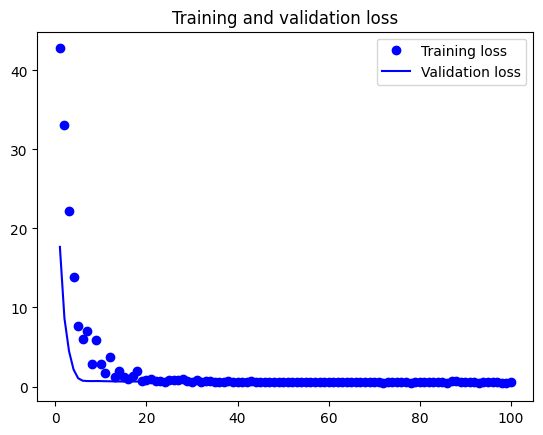

In [93]:
epochs = range(1, len(model1.history["loss"]) + 1)
loss = model1.history["loss"]
val_loss = model1.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

In [94]:
print(f"Test Accuracy: {model.evaluate(x_test,y_test)[1]:.2f}")

63/63 [==============================] - 0s 559us/step - loss: 0.3206 - accuracy: 0.9215
Test Accuracy: 0.92


## need to consider a more simple model?

# Decision Tree Classifier

In [96]:
clf = DecisionTreeClassifier()

#begin training on the training dataset 
clf.fit(x_train, y_train)

# Print the accuracy of the classifier
print("Accuracy:", clf.score(x_test, y_test))

Accuracy: 0.9835


# Confusion Matrix values

In [97]:
# Fit your decision tree classifier on training data and predict on test data
y_pred = clf.predict(x_test)

# Create confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
conf_matrix = [[tp, fp], [fn, tn]]
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[1100, 13], [20, 867]]


# Confusion Matrix heatmap

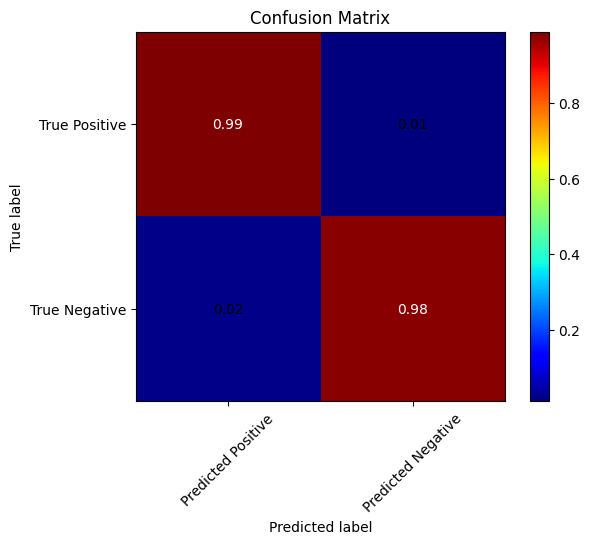

In [98]:
# Create the confusion matrix
conf_matrix = np.array([[tp, fp], [fn, tn]])

# Normalize the confusion matrix to show proportions
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Define the color map
cmap = plt.get_cmap('jet')

# Create the heatmap
plt.imshow(conf_matrix_norm, interpolation='nearest', cmap=cmap)

# Add color bar
plt.colorbar()

# Add axis labels and ticks
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted Positive', 'Predicted Negative'], rotation=45)
plt.yticks(tick_marks, ['True Positive', 'True Negative'])

# Add text annotations for confusion matrix cells
thresh = conf_matrix_norm.max() / 2.
for i, j in np.ndindex(conf_matrix_norm.shape):
    plt.text(j, i, format(conf_matrix_norm[i, j], '.2f'),
             ha="center", va="center",
             color="white" if conf_matrix_norm[i, j] > thresh else "black")

# Add title and show the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

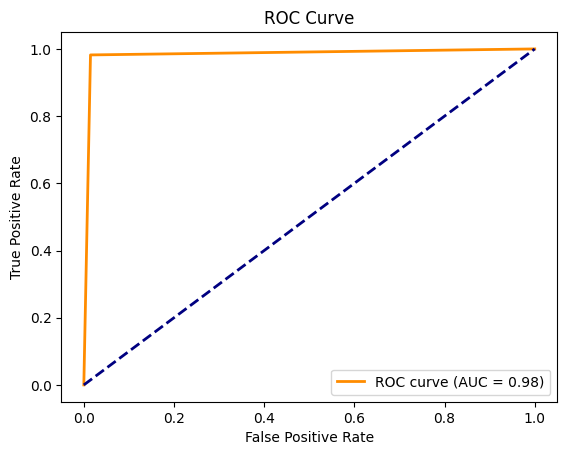

In [99]:


# Fit your decision tree classifier on training data and predict on test data
y_score = clf.predict_proba(x_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()